In [1]:
import os
from torch.utils.data import DataLoader
from earthvision.datasets import XView

In [2]:
train_dataset = XView(root='D:/jakartaresearch', data_mode='train')
valid_dataset = XView(root='D:/jakartaresearch', data_mode='validation')

In [3]:
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=1, shuffle=True)

In [4]:
train_data, train_label = next(iter(train_dataloader))
valid_data = next(iter(valid_dataloader))

In [5]:
print(train_data.shape)
print(train_label['boxes'].shape)
print(train_label['labels'].shape)
print(valid_data.shape)

torch.Size([1, 2713, 3376, 3])
torch.Size([1, 90, 4])
torch.Size([1, 90])
torch.Size([1, 2670, 2869, 3])


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

def draw_bboxes(img, boxes=None):
    """
    A helper function to draw bounding box rectangles on images
    Args:
        img: image to be drawn on in array format
        boxes: an (N,4) array of bounding boxes
    Returns:
        Image with drawn bounding boxes
    """
    source = Image.fromarray(np.array(img))
    draw = ImageDraw.Draw(source)

    if boxes is not None:
        for b in boxes:
            xmin, ymin, xmax, ymax = b
            draw.rectangle(((xmin, ymin), (xmax, ymax)), outline='red')
    return source

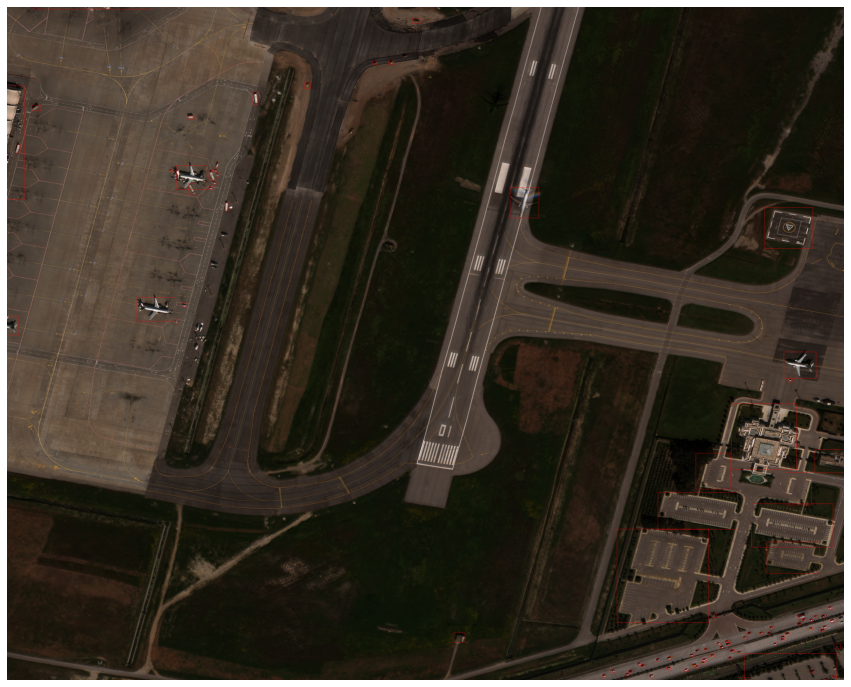

In [7]:
img = train_data[0]
bbox = train_label['boxes'][0]
labeled = draw_bboxes(img, bbox)
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(labeled);

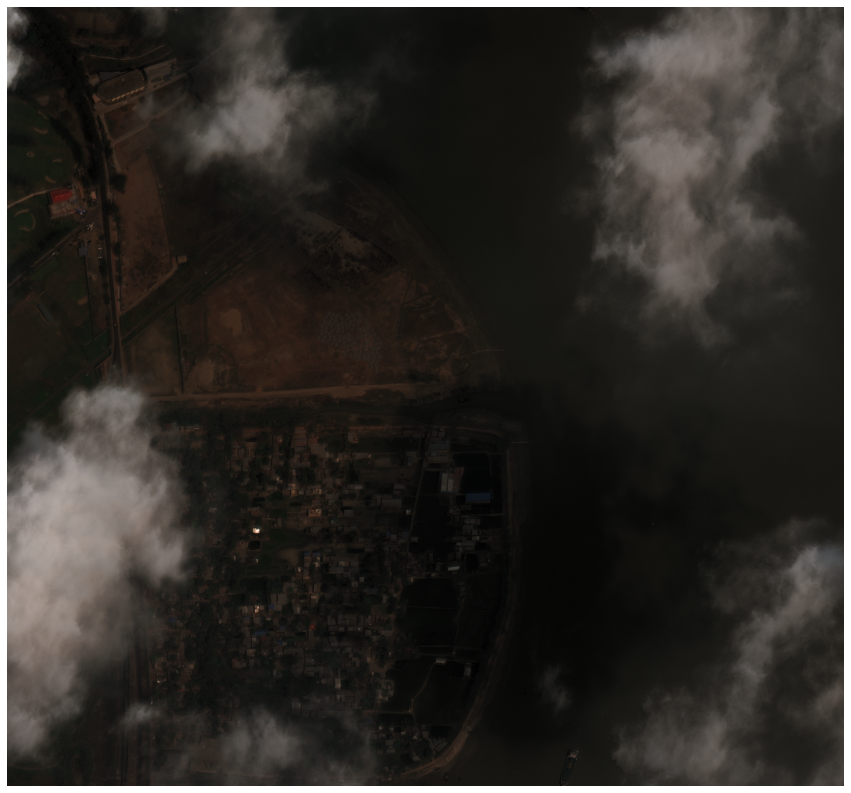

In [8]:
img = valid_data[0]
labeled = draw_bboxes(img)
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(labeled);

In [9]:
train_label['labels']

tensor([[ 2, 48,  2,  2,  2,  2,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  5,  5,  5,  5,  5,  5,  9,  5,  5,  5,  5,  5,  5,  5,  5,  5,
          5, 53, 53, 53, 53, 53, 53, 53, 48, 48,  5, 54, 48,  6,  6,  6,  6,  5,
          5,  5,  5,  5,  6,  4,  4,  6, 33, 33, 42, 51,  9,  5, 48, 58, 58, 42]],
       dtype=torch.int32)